In [46]:
! pip install langgraph -q

In [47]:
from langgraph.graph import Graph
from langgraph.graph import StateGraph
from dotenv import load_dotenv
load_dotenv()

True

In [48]:
# langgraph->orchestration->pipeline

In [49]:
# langgraph------>  nodes,edges,State
# node-----------> funtions
# edge----------> connectivity between nodes(funtions)

In [50]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")


# from langchain_openai import ChatOpenAI
# openai_model =ChatOpenAI(model="gpt-4")

# from langchain_openai import OpenAIEmbeddings
# openai_embedding=OpenAIEmbeddings(model='text-embedding-3-large')

In [51]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [52]:
def LLM(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    response = llm.invoke(input).content
    return response
    

In [53]:
# def LLM(input):
#     llm = ChatOpenAI(model="gpt-4")
#     response = llm.invoke(input).content
#     return response
    

In [54]:
LLM("what is  3 +3*5-10 just give me the fnal output don't give me the internal details/steps")

'8'

In [55]:
def Counter_Token(input):
    token = input.split()
    token_number = len(token)
    response = f"total number of token in the generated output {token_number}"
    return response
    

In [56]:
Counter_Token("AI vs GenAI, which i need to learn first?")

'total number of token in the generated output 9'

In [57]:
workflow = Graph()

In [58]:
workflow.add_node("MY LLM",LLM)

In [59]:
workflow.add_node("Token Counter",Counter_Token)

In [60]:
workflow.add_edge("MY LLM", "Token Counter")

In [61]:
workflow.set_entry_point("MY LLM")
workflow.set_finish_point("Token Counter")

In [62]:
app = workflow.compile()

In [63]:
from IPython.display import Image, display

In [64]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langgraph.graph.graph.LangGraphInput'>, metadata=None), 'MY LLM': Node(id='MY LLM', name='MY LLM', data=MY LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'Token Counter': Node(id='Token Counter', name='Token Counter', data=Token Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langgraph.graph.graph.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='MY LLM', target='Token Counter', data=None, conditional=False), Edge(source='Token Counter', target='__end__', data=None, conditional=False), Edge(source='__start__', target='MY LLM', data=None, conditional=False)])

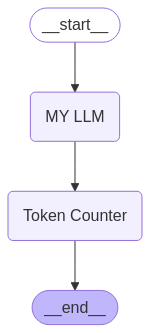

In [65]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [66]:
app.invoke("what is a agentic ai explain me in very detailed manner?")

'total number of token in the generated output 631'

In [67]:
for output in app.stream("what is a agentic ai explain me in very detailed manner?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from MY LLM
_______
Agentic AI refers to a type of artificial intelligence that can act autonomously, pursue goals, and make decisions independently on behalf of a user or another system. It goes beyond simply responding to commands and instead operates with a degree of agency, similar to how a human agent would. This involves several key characteristics:

**1. Goal-Oriented Behavior:** Agentic AI is designed around specific goals or objectives. These goals can be explicitly programmed by humans, learned through interaction with the environment, or derived from a combination of both.  The AI then takes actions aimed at achieving these goals, even in complex and dynamic situations.

**2. Proactive Decision-Making:**  Instead of passively waiting for instructions, agentic AI can anticipate needs, identify opportunities, and make proactive decisions to advance its goals. This proactive nature is a key differentiator from traditional reactive systems.  For example, a persona

In [68]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [69]:
loader = DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)

docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 200
)

new_docs = text_splitter.split_documents(documents=docs)

doc_strings = [doc.page_content for doc in new_docs]

In [70]:
doc_strings

['A COVID‑19 vaccine is a vaccine intended to provide acquired immunity against severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), the virus that causes coronavirus disease 2019 (COVID‑19).',
 'Knowledge about the structure and function of previous coronaviruses causing diseases like severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS) accelerated the development of various vaccine platforms in early 2020.[1] In 2020, the first COVID‑19 vaccines were developed and made available to the public through emergency authorizations[2] and conditional approvals.[3][4] However, immunity from the vaccines wanes over time, requiring people to get booster doses of',
 'and made available to the public through emergency authorizations[2] and conditional approvals.[3][4] However, immunity from the vaccines wanes over time, requiring people to get booster doses of the vaccine to maintain protection against COVID‑19.[2]',
 'The COVID‑19 vaccines are widely cre

In [71]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [72]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

query = "why scientist was working hard for what kind of vaccines?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

C:\Users\Mohan\AppData\Local\Temp\ipykernel_19484\104866849.py:6: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': 'data\\1.txt'}
Despite the extremely rapid development of effective mRNA and viral vector vaccines, worldwide vaccine equity has not been achieved. The development and use of whole inactivated virus (WIV) and protein-based vaccines have also been recommended, especially for use in developing countries.[14][15]

The 2023 Nobel Prize in Physiology or Medicine was awarded to Katalin Karikó and Drew Weissman for the development of effective mRNA vaccines against COVID‑19.[16][17][18]


Vaccine technologies


In [73]:
for doc in docs:
    print(doc)

page_content='Despite the extremely rapid development of effective mRNA and viral vector vaccines, worldwide vaccine equity has not been achieved. The development and use of whole inactivated virus (WIV) and protein-based vaccines have also been recommended, especially for use in developing countries.[14][15]

The 2023 Nobel Prize in Physiology or Medicine was awarded to Katalin Karikó and Drew Weissman for the development of effective mRNA vaccines against COVID‑19.[16][17][18]


Vaccine technologies' metadata={'source': 'data\\1.txt'}
page_content='Despite the extremely rapid development of effective mRNA and viral vector vaccines, worldwide vaccine equity has not been achieved. The development and use of whole inactivated virus (WIV) and protein-based vaccines have also been recommended, especially for use in developing countries.[14][15]

The 2023 Nobel Prize in Physiology or Medicine was awarded to Katalin Karikó and Drew Weissman for the development of effective mRNA vaccines aga

In [74]:
AgentState= { } 

In [75]:
AgentState["messages"]=[]

In [76]:
#manually i had created 
AgentState

{'messages': []}

In [77]:
AgentState["messages"].append("hi")

In [78]:
AgentState["messages"].append("how are you?")

In [79]:
AgentState["messages"].append("what are you doing?")

In [80]:
# We are flowing this state across the different different nodes inside the langgraph workflow
AgentState

{'messages': ['hi', 'how are you?', 'what are you doing?']}

In [81]:
AgentState

{'messages': ['hi', 'how are you?', 'what are you doing?']}

In [ ]:
def function_1(AgentState):
    message = AgentState["messages"]
    
    question = message[-1] #Taking the last meaages
    
    complete_prompt = "Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    # print(AgentState)
    
    return AgentState
   
#############################################################################################
 
def function_2(AgentState):
    messages = AgentState['messages']
    
    question = messages[0] ## Fetching the user question,taking the first message
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result
    

In [83]:
workflow = Graph()
workflow.add_node("LLM", function_1)
workflow.add_node("RAGtool", function_2)
workflow.add_edge('LLM', 'RAGtool')
workflow.set_entry_point("LLM")
workflow.set_finish_point("RAGtool")
app2 = workflow.compile()


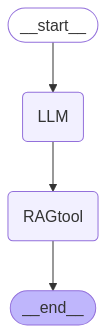

In [84]:
display(Image(app2.get_graph().draw_mermaid_png())) 

In [85]:
app2.invoke({"messages":["What is Covid-19 virus?"]})

{'messages': ['What is Covid-19 virus?', 'A novel coronavirus causing a respiratory illness called COVID-19.']}


'Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), the virus that causes coronavirus disease 2019 (COVID‑19).'

In [86]:
for output in app2.stream({"messages":["What is Covid-19 virus?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

{'messages': ['What is Covid-19 virus?', 'A novel coronavirus that causes respiratory illness.']}
here is output from LLM
_______
{'messages': ['What is Covid-19 virus?', 'A novel coronavirus that causes respiratory illness.']}


here is output from RAGtool
_______
Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), the virus that causes coronavirus disease 2019 (COVID‑19).




In [87]:
print("all ok")

all ok


In [88]:
loader = DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [89]:
new_docs

[Document(metadata={'source': 'data\\1.txt'}, page_content='A COVID‑19 vaccine is a vaccine intended to provide acquired immunity against severe acute'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='to provide acquired immunity against severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2),'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='respiratory syndrome coronavirus 2 (SARS-CoV-2), the virus that causes coronavirus disease 2019'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='the virus that causes coronavirus disease 2019 (COVID‑19).'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='Knowledge about the structure and function of previous coronaviruses causing diseases like severe'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='coronaviruses causing diseases like severe acute respiratory syndrome (SARS) and Middle East'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='acute respiratory syndrome

In [91]:
doc_strings

['A COVID‑19 vaccine is a vaccine intended to provide acquired immunity against severe acute',
 'to provide acquired immunity against severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2),',
 'respiratory syndrome coronavirus 2 (SARS-CoV-2), the virus that causes coronavirus disease 2019',
 'the virus that causes coronavirus disease 2019 (COVID‑19).',
 'Knowledge about the structure and function of previous coronaviruses causing diseases like severe',
 'coronaviruses causing diseases like severe acute respiratory syndrome (SARS) and Middle East',
 'acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS) accelerated the',
 'East respiratory syndrome (MERS) accelerated the development of various vaccine platforms in early',
 'development of various vaccine platforms in early 2020.[1] In 2020, the first COVID‑19 vaccines',
 '2020.[1] In 2020, the first COVID‑19 vaccines were developed and made available to the public',
 'were developed and made available to th

In [1]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

NameError: name 'Chroma' is not defined

In [93]:
query = "Tell me about India's Industrial Growth?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

{'source': 'data\\Test_file.txt'}
What are vectors?


In [94]:
docs

[Document(metadata={'source': 'data\\Test_file.txt'}, page_content='What are vectors?'),
 Document(metadata={'source': 'data\\Test_file.txt'}, page_content='What is a vector database?'),
 Document(metadata={'source': 'data\\1.txt'}, page_content='acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS) accelerated the')]

In [96]:
from typing import TypedDict, Annotated,Sequence

In [97]:
import operator

In [98]:
from langchain_core.messages import BaseMessage

In [99]:
from langchain.prompts import PromptTemplate

In [100]:
AgentState

{'messages': ['hi', 'how are you?', 'what are you doing?']}

In [101]:
state = {"messages":["hi","how are you?","what is a japan GDP?","which is good model in llm world?"]}

In [102]:
#last message inside the message list
state["messages"][-1]

'which is good model in llm world?'

In [103]:
#first message from the message list
state["messages"][0]

'hi'

In [104]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [105]:
from langchain_core.messages import HumanMessage

In [106]:
state = AgentState(messages=[HumanMessage(content="hi there")])

In [107]:
state

{'messages': [HumanMessage(content='hi there', additional_kwargs={}, response_metadata={})]}

In [108]:
state = AgentState(messages=["hi"])

In [109]:
state

{'messages': ['hi']}

In [110]:
from pydantic import BaseModel, Field

In [111]:
class TopicSelectionParser(BaseModel):
    Topic:str = Field(description="selected topic")
    Reasoning:str = Field(description="reasoning behind the topic")

In [113]:
pydantic_obj = TopicSelectionParser(Topic="india", Reasoning="india is growing country?")

In [114]:
pydantic_obj.Topic

'india'

In [115]:
pydantic_obj.Reasoning

'india is growing country?'

In [116]:
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate

In [117]:
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [118]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "reasoning behind the topic", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [119]:
def function_1(state:AgentState):
    
    message = state["messages"]
    
    question = message[-1] 
    
    print("***********here is my question********")
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [Japan, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                            input_variables=[question],
                            partial_variables={"format_instructions" : parser.get_format_instructions()}
                            )
    
    chain = prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })
    
    print("***********my response********")
    print(response)
    
    return {"messages":[response.Topic]}

In [120]:
state = {"messages":["tell me about the japan's industrial growth?"]}

In [121]:
state = {"messages":["hi how are you?"]}

In [122]:
function_1(state)

***********here is my question********
hi how are you?
***********my response********
Topic='Not Related' Reasoning='The query is a general greeting and does not mention Japan or anything related to it.'


{'messages': ['Not Related']}

In [123]:
def router(state:AgentState):
    print("***********entering into router********")
    print("*********my state from router********")
    print(state)
    
    message=state["messages"]
    
    last_message=message[-1]
    
    print("***********last message********")    
    print(last_message)
    
    if "Japan" in last_message:
        return "RAG Call"
    else:
        return "Simple LLM Call"

In [124]:
def function_2(state:AgentState):
    print("*********my state from function_2(rag)********")
    print(state)
    
    
    print('-> Calling RAG ->')
    
    messages = state['messages']
    
    question = messages[0] ## Fetching the user question
    
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    response={"messages": [result]}
    print("*********my state from function_2(rag)********")
    print(state)
    return response
    

In [125]:
def function_3(state:AgentState):
    print('-> Calling LLM ->')

    messages = state['messages']
    
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    response={"messages": [response.content]}
    print("*********my state from function_3(LLM)********")
    print(state)
    return response

In [126]:
from langgraph.graph import StateGraph, END

In [127]:
workflow = StateGraph(AgentState)

In [128]:
workflow.add_node("supervisor",function_1)

In [129]:
workflow.add_node("RAG",function_2)

In [130]:
workflow.add_node("LLM",function_3)

In [131]:
workflow.set_entry_point("supervisor")

In [132]:
workflow.add_conditional_edges(
    "supervisor",
    router,
    {
        "RAG Call": "RAG",
        "Simple LLM Call": "LLM"
    },
    
)

In [133]:
workflow.add_edge("RAG",END)


workflow.add_edge("LLM",END)


app=workflow.compile()

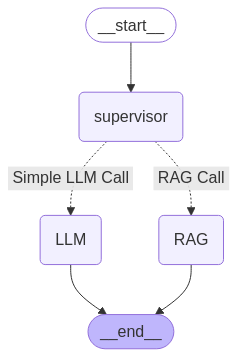

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [134]:
response = app.invoke({"messages":["can you tell me about the japan industrial growth with GDP?"]})

***********here is my question********
can you tell me about the japan industrial growth with GDP?
***********my response********
Topic='Japan' Reasoning="The query explicitly asks about Japan's industrial growth and GDP."
***********entering into router********
*********my state from router********
{'messages': ['can you tell me about the japan industrial growth with GDP?', 'Japan']}
***********last message********
Japan
*********my state from function_2(rag)********
{'messages': ['can you tell me about the japan industrial growth with GDP?', 'Japan']}
-> Calling RAG ->
can you tell me about the japan industrial growth with GDP?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]
******

In [135]:
response

{'messages': ['can you tell me about the japan industrial growth with GDP?',
  'Japan',
  "This information is not available in the provided context. The text discusses high-income countries and technology platforms, but does not mention Japan's industrial growth or GDP."]}

In [137]:
response["messages"][-1]

"This information is not available in the provided context. The text discusses high-income countries and technology platforms, but does not mention Japan's industrial growth or GDP."

In [138]:
response = app.invoke({"messages":["hi how are you?"]})

***********here is my question********
hi how are you?
***********my response********
Topic='Not Related' Reasoning='The query is a general greeting and does not mention Japan or anything related to it.'
***********entering into router********
*********my state from router********
{'messages': ['hi how are you?', 'Not Related']}
***********last message********
Not Related
-> Calling LLM ->
*********my state from function_3(LLM)********
{'messages': ['hi how are you?', 'Not Related']}


In [139]:
response["messages"][-1]

"I'm doing well, thank you for asking! How are you?"

In [140]:
for output in app.stream({"messages":["what is a age of donald trump?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

***********here is my question********
what is a age of donald trump?
***********my response********
Topic='Not Related' Reasoning="The query asks about Donald Trump's age, which has no relation to Japan."
***********entering into router********
*********my state from router********
{'messages': ['what is a age of donald trump?', 'Not Related']}
***********last message********
Not Related
here is output from supervisor
_______
{'messages': ['Not Related']}


-> Calling LLM ->


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
}
].


*********my state from function_3(LLM)********
{'messages': ['what is a age of donald trump?', 'Not Related']}
here is output from LLM
_______
{'messages': ['Donald Trump was born on June 14, 1946.  Therefore, as of October 26, 2023, he is 77 years old.']}




In [ ]:
# very useful method for routing in multiagent system
# command()